In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')


In [3]:
#SIBSP - # of siblings / spouses aboard the Titanic
#PARCH - # of parents / children aboard the Titanic

train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#EXPLORE AND CLEAN OUR DATASET

#drop unneccesary columns

train_data2 = train_data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1)
null = train_data2.isnull().sum()
null

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [5]:
#fill null values

mean_female_age = train_data2['Age'][train_data2['Sex'] == 'female'].median()
mean_male_age = train_data2['Age'][train_data2['Sex'] == 'male'].median()

train_data2.loc[train_data2['Sex'] == 'female', 'Age'] = train_data2.loc[train_data2['Sex'] == 'female', 'Age'].fillna(mean_female_age)
train_data2.loc[train_data2['Sex'] == 'male', 'Age'] = train_data2.loc[train_data2['Sex'] == 'male', 'Age'].fillna(mean_male_age)
null = train_data2.isnull().sum()
null

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [6]:
#train our model
train_data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:

from sklearn.ensemble import RandomForestClassifier

y = train_data2['Survived']

features = train_data2[["Pclass","Sex","SibSp","Parch"]]

X = pd.get_dummies(features)
X_test = pd.get_dummies(test_data[["Pclass","Sex","SibSp","Parch"]])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [8]:
X

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,False,True
1,1,1,0,True,False
2,3,0,0,True,False
3,1,1,0,True,False
4,3,0,0,False,True
...,...,...,...,...,...
886,2,0,0,False,True
887,1,0,0,True,False
888,3,1,2,True,False
889,1,0,0,False,True


In [9]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [10]:
model.score(X,y)

0.8159371492704826

In [11]:
import matplotlib.pyplot as plt
import numpy as np

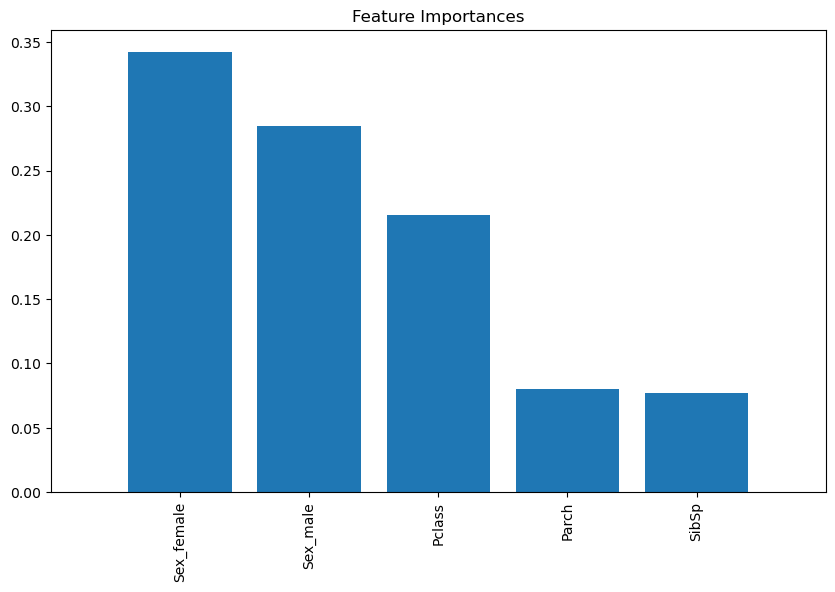

In [12]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()